## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s):
###### Python version:
###### Submission deadline: 

This iPython notebook is a template which you will use for your Project 1 submission. 

Marking will be applied on the functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 

In [2930]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import sklearn.metrics as met 
import math

from sklearn.neighbors import KNeighborsClassifier

In [2931]:
def header_name(file_data):
    
    headers = [header for header in file_data.columns.tolist()]
    
    return headers

In [2932]:
def transpose_file_data(file_data):
    
    values = np.transpose(file_data.values.tolist())
    
    return values

In [2933]:
def hist_plotter(headers, values, index):
    
    mpl.title(headers[index])
    mpl.hist(np.array(values[index]))
    return mpl.show()

In [2934]:
def hist_plotter_heart_disease_stroke(processed_data):
   
    no_heart_stroke = []
    no_heart_no_stroke = []
    heart_no_stroke = []
    heart_stroke = []
    
    heart_disease_stroke = processed_data.iloc[:,[5,10]]
    
    plotter_data = heart_disease_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        if plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            no_heart_no_stroke.append(0)
        
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
        
            no_heart_stroke.append(1)
        
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            heart_no_stroke.append(2)
        
        elif plotter_data[index][0] == 1 and plotter_data[index][0] == 1:
            
            heart_stroke.append(3)
        
        else:
            print("error")
    
    mpl.title("Some title")
    mpl.hist(np.array(no_heart_no_stroke))
    mpl.hist(np.array(no_heart_stroke))
    mpl.hist(np.array(heart_no_stroke))
    mpl.hist(np.array(heart_stroke))
    mpl.xlim([0,4])
    mpl.xticks(np.arange(0,4,1))
    mpl.show()

In [2935]:
def hist_plotter_hypertension_stroke(processed_data):
    
    no_hyper_no_stroke = []
    no_hyper_stroke = []
    hyper_no_stroke = []
    hyper_stroke = []
    
    hypertension_stroke = processed_data.iloc[:,[4,10]]
    
    plotter_data = hypertension_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        if plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            no_hyper_no_stroke.append(0)
        
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
        
            no_hyper_stroke.append(1)
        
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            hyper_no_stroke.append(2)
        
        elif plotter_data[index][0] == 1 and plotter_data[index][0] == 1:
            
            hyper_stroke.append(3)
        
        else:
            print("error")
    
    mpl.title("Some title")
    mpl.hist(np.array(no_hyper_no_stroke))
    mpl.hist(np.array(no_hyper_stroke))
    mpl.hist(np.array(hyper_no_stroke))
    mpl.hist(np.array(hyper_stroke))
    mpl.xlim([0,4])
    mpl.xticks(np.arange(0,4,1))
    mpl.show()

In [2936]:
def hist_plotter_smoking_stroke(processed_data):
    
    never_smoked_no_stroke = []
    never_smoked_stroke = []
    formerly_smoked_no_stroke = []
    formerly_smoked_stroke = []
    smokes_no_stroke = []
    smokes_stroke = []
    
    smoking_stroke = processed_data.iloc[:,[9,10]]
    
    plotter_data = smoking_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        if plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            never_smoked_no_stroke.append(0)
        
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 1:
        
            never_smoked_stroke.append(1)
        
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            formerly_smoked_no_stroke.append(2)
        
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
            
            formerly_smoked_stroke.append(3)
            
        elif plotter_data[index][0] == 2 and plotter_data[index][1] == 0:
        
            smokes_no_stroke.append(4)
        
        elif plotter_data[index][0] == 2 and plotter_data[index][1] == 1:
        
            smokes_stroke.append(5)
        
        else:
            print("error")
    
    mpl.title("Some title")
    mpl.hist(np.array(never_smoked_no_stroke))
    mpl.hist(np.array(never_smoked_stroke))
    mpl.hist(np.array(formerly_smoked_no_stroke))
    mpl.hist(np.array(formerly_smoked_stroke))
    mpl.hist(np.array(smokes_no_stroke))
    mpl.hist(np.array(smokes_stroke))
    mpl.xlim([0,6])
    mpl.xticks(np.arange(0,6,1))
    mpl.show()

In [2937]:
# Helper functions to find instances
def total_instances(file_data):
    
    n_instances = len(file_data.columns) - 1
    
    instances = file_data.iloc[:,:n_instances]
    
    return instances

In [2938]:
def total_labels(file_data):
    
    labels = file_data.iloc[:,[-1]]
    
    return labels

In [2939]:
# This function should transform data into a usable format 
def preprocess(csv_file_name):
    
    file_data = pd.read_csv(csv_file_name)
    
    #convert continuous values to integers
    
    #equal width division
    
    file_data["avg_glucose_level"] = pd.cut(file_data["avg_glucose_level"], bins=5, labels=["VeryLow","Low","Medium","High","VeryHigh"])
    file_data["bmi"] = pd.cut(file_data["bmi"], bins=5, labels=["VeryLow","Low","Medium","High","VeryHigh"])
    file_data["age"] = pd.cut(file_data["age"], bins=5, labels=["Young","Adults","MiddleAged","OlderAdults","Elderly"])
    
    for attributes in file_data.columns:
        values = sorted(set([value for value in file_data[attributes].values])) 
        temp_dict = dict(zip(values, range(len(values))))
        file_data[attributes] = file_data[attributes].map(lambda key: temp_dict.get(key) if key in temp_dict else key)
    
    return file_data

In [2940]:
# This function should split a data set into a training set and hold-out test set
def split_data(file_data, ratio):
    
    train_data = file_data.sample(frac=ratio)
    
    test_data = file_data.drop(train_data.index)
    
    reordered_train_data = train_data.reset_index(drop=True)
    
    reordered_test_data = test_data.reset_index(drop=True)
    
    return reordered_train_data,reordered_test_data

In [2941]:
def class_count(labels):
    
    class_labels = [0] * len(set([counts for column in labels.columns for counts in labels[column].values]))
    
    for column in labels.columns: 
        for index in labels[column].index:
            class_labels[labels.at[index,column]] += 1
        
    return class_labels

In [2942]:
def prior_probability(labels):
    
    N = len(labels.index)
    
    class_labels = class_count(labels)
    
    prior = [index / N for index in class_labels]
        
    return prior

In [2943]:
def likelihoods(attributes,labels,epsilon):
    
    #will make dictionary of dictionary of dictionaries as it will be easier to manage values with attribute headings
    
    class_labels = [counts for column in labels.columns for counts in labels[column].values]
    
    stroke = {index:{} for index in range(len(set(class_labels)))}
    
    for label in stroke.keys():
        for attribute in attributes.columns:
            stroke[label][attribute] = {values:0 for values in set(attributes[attribute].values)}
            
    for attribute in attributes.columns:
        for index in attributes[attribute].index:
            stroke[class_labels[index]][attribute][attributes.at[index,attribute]] += 1
            
    for label in stroke.keys():
        for attribute in stroke[label].keys():
            for value in stroke[label][attribute]:
                if stroke[label][attribute][value] > 0:
                    stroke[label][attribute][value] = stroke[label][attribute][value] / class_count(labels)[label]
                else:
                    stroke[label][attribute][value] += epsilon
    
    return stroke

In [2944]:
# option (2)

# This function should build a supervised NB model

def train_NB(train_data,epsilon):
    
    labels = total_labels(train_data)
    
    attributes = total_instances(train_data)
    
    prior = prior_probability(labels)
    
    likelihood_values = likelihoods(attributes,labels,epsilon)
    
    return prior, likelihood_values

In [2945]:
def KNN(train_data,test_data,k):
    
    labels = total_labels(train_data)
    
    attributes = total_instances(train_data)
    
    test_attributes = total_instances(test_data)
    
    KNN_train = KNeighborsClassifier(n_neighbors = k)
    
    class_labels = [counts for column in labels.columns for counts in labels[column].values]
    
    KNN_train.fit(attributes,class_labels)
    
    KNN_prediction = KNN_train.predict(test_attributes)
    
    return KNN_prediction

In [2946]:
def predictor(index,test_attributes,prior,likelihood_values):
    
    prediction_values = []
    
    for labels in range(len(prior)):
        outputs = math.log(prior[labels]) 
        for column in test_attributes.columns:
            if test_attributes.at[index,column] in likelihood_values[labels][column]:
                outputs += math.log(likelihood_values[labels][column][test_attributes.at[index,column]])                
        prediction_values.append(outputs)
            
    return np.argmax([prediction_values])

In [2947]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(test_data,prior,likelihood_values):
    
    all_outputs = []
    
    test_attributes = total_instances(test_data)
    
    for index in test_attributes.index:
        all_outputs.append(predictor(index,test_attributes,prior,likelihood_values))
    
    return all_outputs

In [2948]:
def zero_R(train_data,test_data):
    
    original_labels = total_labels(train_data)
    
    counts = class_count(original_labels)
    
    majority_class = counts.index(max(counts))
    
    baseline_predicted_class = [majority_class] * len(test_data)
    
    return baseline_predicted_class

In [2949]:
# This function should evaluate a set of predictions in terms of metrics
def evaluate(predicted_values,test_data):
    
    original_labels = total_labels(test_data)

    original_test_labels = [counts for column in original_labels.columns for counts in original_labels[column].values]
    
    accuracy = met.accuracy_score(original_test_labels, predicted_values)
    f1 = met.f1_score(original_test_labels,predicted_values, zero_division=0)
    precision = met.precision_score(original_test_labels,predicted_values, zero_division=0)
    recall = met.recall_score(original_test_labels,predicted_values, zero_division=0)
    
    return accuracy,f1,precision,recall

## Questions (you may respond in a cell or cells below):

You should respond to questions 1-3. In question 2 (b) you can choose between two options. A response to a question should take about 100--200 words, and make reference to the data wherever possible.

### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]



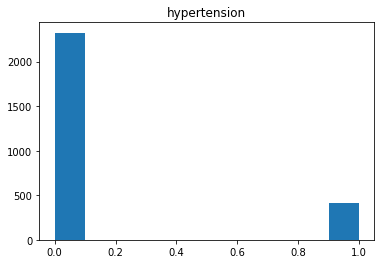

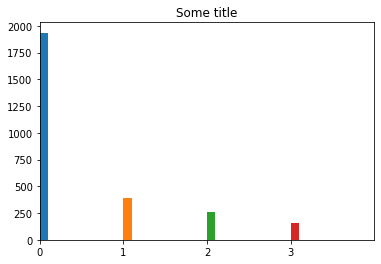

In [2967]:
#Question 1(a) Answer:

processed_data = preprocess("stroke_update.csv")

headers = header_name(processed_data)

values = transpose_file_data(processed_data)

hypertension_column = 4

hist_plotter(headers, values, hypertension_column)

hist_plotter_hypertension_stroke(processed_data)

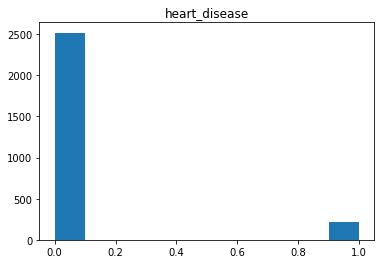

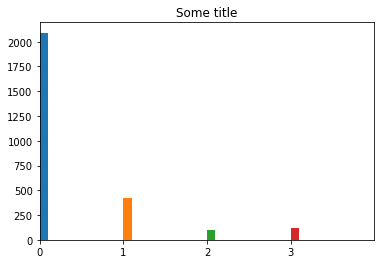

In [2951]:
#Question 1(a) Answer:

hist_plotter(headers, values, 5)

hist_plotter_heart_disease_stroke(processed_data)

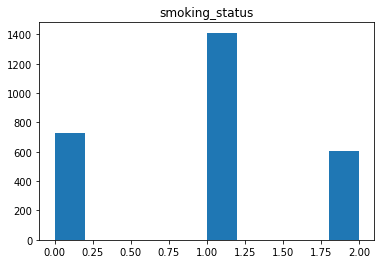

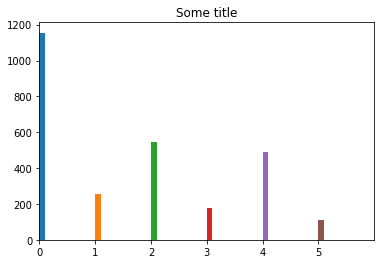

In [2952]:
hist_plotter(headers, values, 9)

hist_plotter_smoking_stroke(processed_data)

Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.


**Q1(a) Answer:** `Answer`

**Q1(b) Answer:** `Answer`

### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

**Q2(a) Answer:** `Answer`

In [2956]:
#Question 2(b) Answer:

ratio = 0.8

epsilon = 1e-10

total_accuracy = []

total_f1 = []

total_precision = []

total_recall = []

total_baseline_accuracy = []

total_baseline_f1 = []

total_baseline_precision = []

total_baseline_recall = []

max_loop = 100

for index in range(max_loop):
    
    train_data,test_data = split_data(processed_data,ratio)

    prior,likelihood_values = train_NB(train_data,epsilon)

    predictions = predict(test_data,prior,likelihood_values)

    accuracy,f1,precision,recall = evaluate(predictions,test_data)
    
    total_accuracy.append(accuracy)
    
    total_f1.append(f1)
    
    total_precision.append(precision)
    
    total_recall.append(recall)

    baseline_predicted_class = zero_R(train_data,test_data)
    
    baseline_accuracy,baseline_f1,baseline_precision,baseline_recall = evaluate(baseline_predicted_class,test_data)
    
    total_baseline_accuracy.append(baseline_accuracy)
    
    total_baseline_f1.append(baseline_f1)
    
    total_baseline_precision.append(baseline_precision)
    
    total_baseline_recall.append(baseline_recall)
    

print(np.sum(total_accuracy) / max_loop)

print(np.sum(total_f1) / max_loop)

print(np.sum(total_precision) / max_loop)

print(np.sum(total_recall) / max_loop)

print(np.sum(total_baseline_accuracy) / max_loop)

print(np.sum(total_baseline_f1) / max_loop)

print(np.sum(total_baseline_precision) / max_loop)

print(np.sum(total_baseline_recall) / max_loop)

0.7874452554744527
0.4555629979228478
0.4677692531476467
0.44640382949100377
0.7999452554744526
0.0
0.0
0.0


**Q2(b) Answer:** `Answer`

**Q2(c) Answer:** `Answer`

### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 4 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

In [2966]:
#Question 3(a) and 3(b) Answer:

total_accuracy = []

total_f1 = []

total_precision = []

total_recall = []

total_baseline_accuracy = []

total_baseline_f1 = []

total_baseline_precision = []

total_baseline_recall = []

K = 10

max_loop = 100

for value in range(K):

    for index in range(max_loop):

        train_data,test_data = split_data(processed_data,ratio)

        predictions = KNN(train_data,test_data,K)

        accuracy,f1,precision,recall = evaluate(predictions,test_data)

        total_accuracy.append(accuracy)

        total_f1.append(f1)

        total_precision.append(precision)

        total_recall.append(recall)

        baseline_predicted_class = zero_R(train_data,test_data)

        baseline_accuracy,baseline_f1,baseline_precision,baseline_recall = evaluate(baseline_predicted_class,test_data)

        total_baseline_accuracy.append(baseline_accuracy)

        total_baseline_f1.append(baseline_f1)

        total_baseline_precision.append(baseline_precision)

        total_baseline_recall.append(baseline_recall)

print(np.sum(total_accuracy) / (max_loop*K))

print(np.sum(total_f1) / (max_loop*K))

print(np.sum(total_precision) / (max_loop*K))

print(np.sum(total_recall) / (max_loop*K))

print(np.sum(total_baseline_accuracy) / (max_loop*K))

print(np.sum(total_baseline_f1) / (max_loop*K))

print(np.sum(total_baseline_precision) / (max_loop*K))

print(np.sum(total_baseline_recall) / (max_loop*K))

0.8003339416058394
0.2030222431258229
0.4991442106200935
0.12895281535534261
0.8009270072992701
0.0
0.0
0.0


**Q3(a) Answer:** `Answer`

**Q3(b) Answer:** `Answer`

**Q3(c) Answer:** `Answer`